In [1]:
from extractors import SpotlightSolution1d, OptimalTransport1d
from utils.coordinates import RadialCoordinates
from utils.make_data import make_gauss, make_donut, make_disk

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define coordinate system
n = 1024
coordinates = RadialCoordinates(1024)
r = coordinates.r

/Users/torchylo/Stanford/Lasers/OTPhaseExtractor/extractors/OTphase.py:63: RuntimeWarning: invalid value encountered in divide
  G0_norm = G0 / G0.sum(axis=1)[:, np.newaxis]


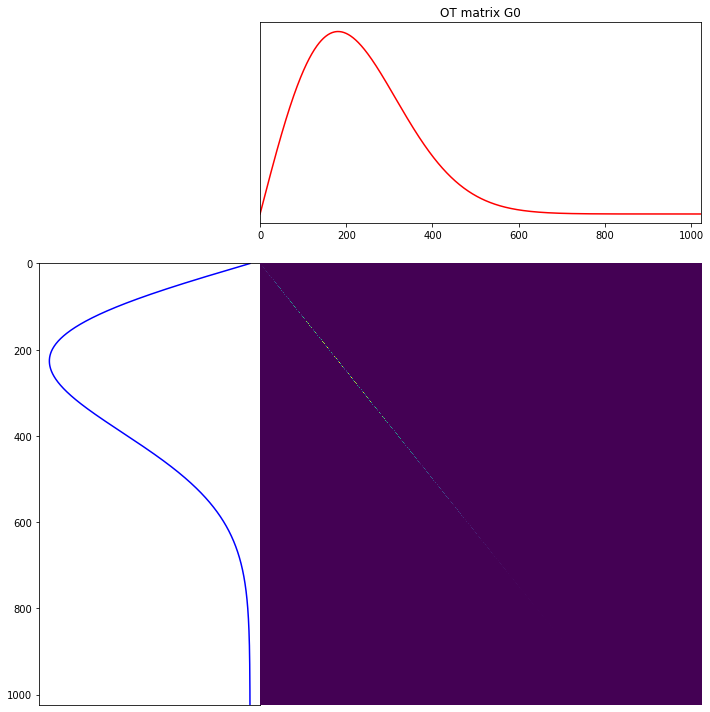

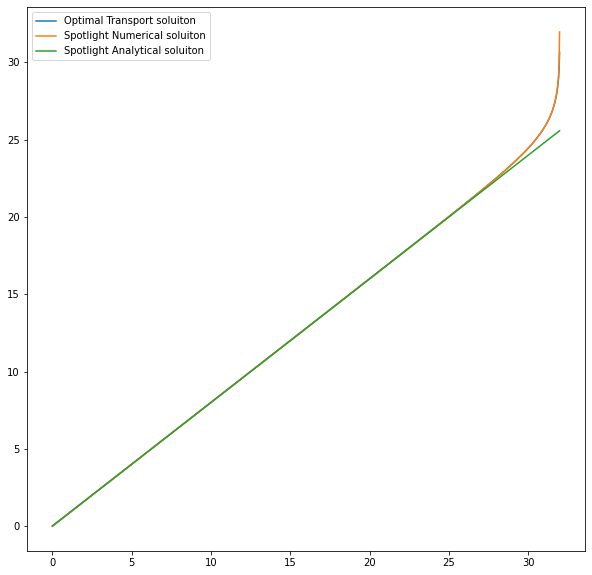

In [4]:
# create test data
sigma_a = 10
sigma_b = 8
a = make_gauss(r, sigma_a) * r
b = make_gauss(r, sigma_b) * r

# compute phase
OTmodel = OptimalTransport1d(method='emd', plot_plan=True)
Spotlight = SpotlightSolution1d()

# compute phase derivatice
dphi_dr_ot = OTmodel(a, b, r)
dphi_dr_spot = Spotlight(a, b, r)
plt.figure(figsize=(10, 10))
plt.plot(r, dphi_dr_ot, label='Optimal Transport soluiton')
plt.plot(r, dphi_dr_spot, label='Spotlight Numerical soluiton')
plt.plot(r, r*sigma_b/sigma_a, label='Spotlight Analytical soluiton')
plt.legend()
plt.show()


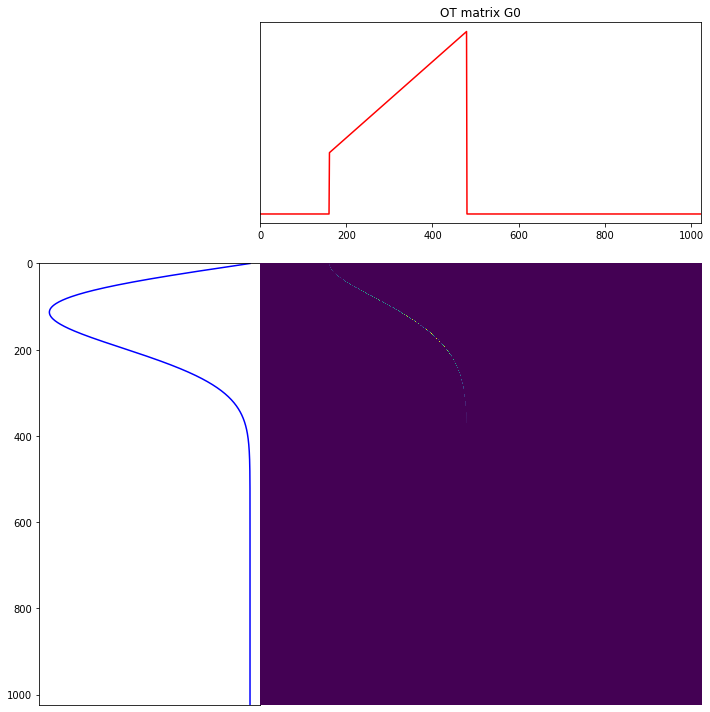

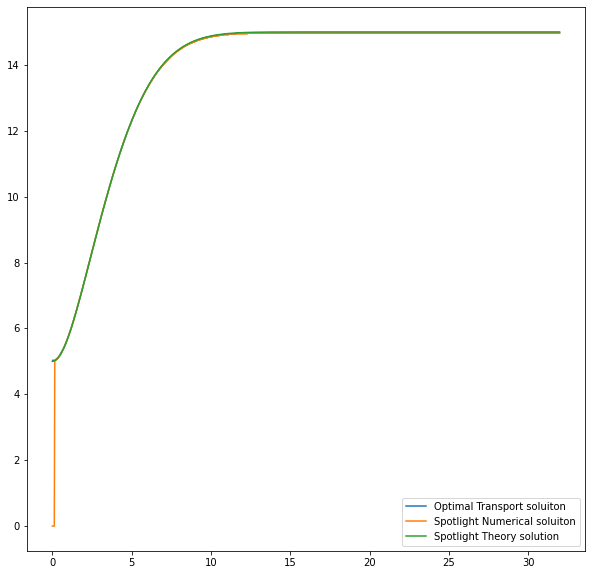

In [6]:
# create test data
R = 10
sigma_a = 5
sigma_b = 5
a = make_gauss(r, sigma_a) * r
b = make_disk(r, R, sigma_b) * r

# compute phase
OTmodel = OptimalTransport1d(method='emd', plot_plan=True)
Spotlight = SpotlightSolution1d()

# compute phase derivatice
dphi_dr_ot = OTmodel(a, b, r)
dphi_dr_spot = Spotlight(a, b, r)
plt.figure(figsize=(10, 10))
plt.plot(r, dphi_dr_ot, label='Optimal Transport soluiton')
plt.plot(r, dphi_dr_spot, label='Spotlight Numerical soluiton')
p_inv = lambda u: np.sqrt((R + sigma_b)**2 - 4 * sigma_b * R * np.exp(-r**2/sigma_a**2))
plt.plot(r, p_inv(r), label='Spotlight Theory solution')
plt.legend()
plt.show()

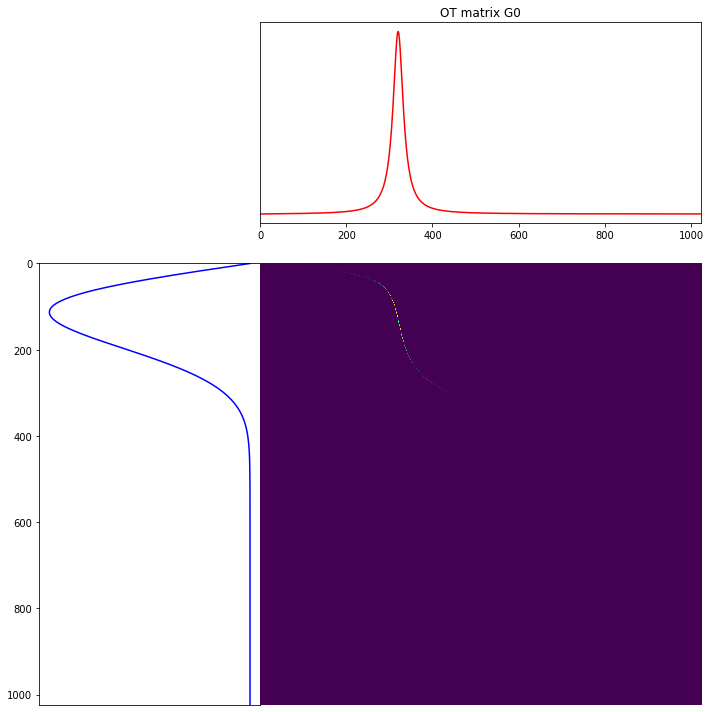

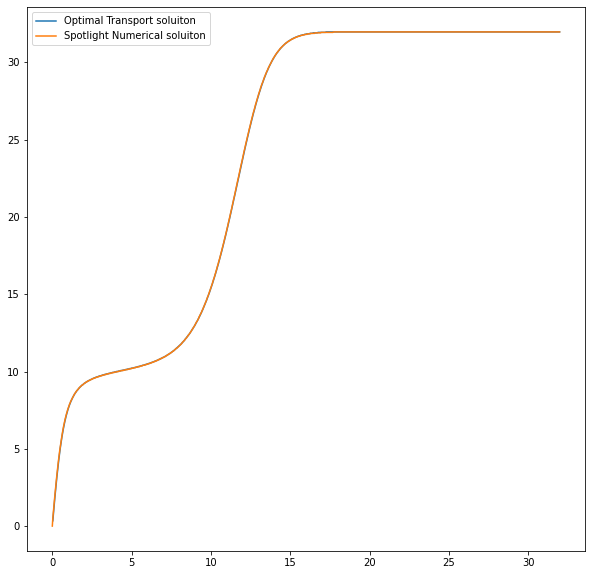

In [7]:
# create test data
R = 10
sigma_a = 5
sigma_b = 3
a = make_gauss(r, sigma_a) * r
b = make_donut(r, R, sigma_b) * r

# compute phase
OTmodel = OptimalTransport1d(method='emd', plot_plan=True)
Spotlight = SpotlightSolution1d()

# compute phase derivatice
dphi_dr_ot = OTmodel(a, b, r)
dphi_dr_spot = Spotlight(a, b, r)
plt.figure(figsize=(10, 10))
plt.plot(r, dphi_dr_ot, label='Optimal Transport soluiton')
plt.plot(r, dphi_dr_spot, label='Spotlight Numerical soluiton')
#plt.plot(r, sigma_b*np.sqrt(np.tan(np.pi/2 - np.pi*np.exp(-r**2/sigma_a**2)+(R/sigma_b)**2)), label='Spotlight Theoretical solution') ## wrong
plt.legend()
plt.show()